In [1]:
import eos
import matplotlib.pyplot as plt
from redist import plot
from ksnunu_utils import * 

In [2]:
q2 = np.linspace(0.1, 19.25, 1000) 

ana = analysis()
p = ana.parameters
k = eos.Kinematics(q2=1.0, q2_min=0.0, q2_max=19.25)
o = eos.Options(**{'form-factors': 'BSZ2015', 'model': 'WET'})
obs = [eos.Observable.make('B->K^*nunu::dBR/dq2', p, eos.Kinematics(q2=q), o) for q in q2]

p['sbnunu::Re{cVL}'].set(1.0)
p['sbnunu::Re{cSL}'].set(0.0)
p['sbnunu::Re{cTL}'].set(0.0)

_, _, vsamples  = ana.sample(N=5000, pre_N=1000, observables=obs)

p['sbnunu::Re{cVL}'].set(0.0)
p['sbnunu::Re{cSL}'].set(1.0)
p['sbnunu::Re{cTL}'].set(0.0)

_, _, ssamples  = ana.sample(N=5000, pre_N=1000, observables=obs)

p['sbnunu::Re{cVL}'].set(0.0)
p['sbnunu::Re{cSL}'].set(0.0)
p['sbnunu::Re{cTL}'].set(1.0)

_, _, tsamples  = ana.sample(N=5000, pre_N=1000, observables=obs)

/filer/z-sv-pool12c/l/Lorenz.Gaertner/micromamba/envs/redist/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded
Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]            Markov chain self adaptation failed; trying diagonalization
Diagonalization succeeded


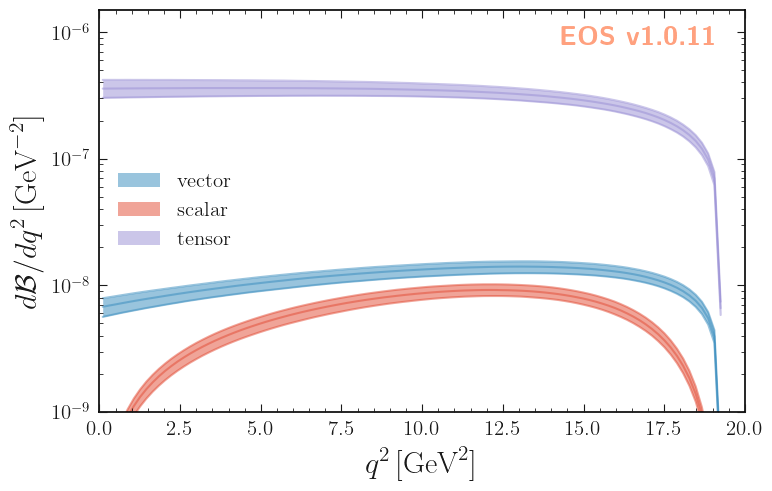

In [5]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [1e-9, 20] },
        'y': { 'label': r'$d\mathcal{B}/dq^2$', 'unit': r'$\textnormal{GeV}^{-2}$', 'range': [1e-9,  1.5e-6] },
        'legend': { 'location': 'best' },
    },
    'contents': [
        {
          'label': 'vector', 'type': 'uncertainty', 'range': [0.0, 20],
          'data': { 'samples': vsamples, 'xvalues': q2 },
          'color': 'C0'
        },
        {
          'label': 'scalar', 'type': 'uncertainty', 'range': [0.0, 20],
          'data': { 'samples': ssamples, 'xvalues': q2 },
          'color': 'C1'
        },
        {
          'label': 'tensor', 'type': 'uncertainty', 'range': [0.0, 20],
          'data': { 'samples': tsamples, 'xvalues': q2 },
          'color': 'C2'
        },
    ]
}
eos.plot.Plotter(plot_args).plot()

plt.yscale('log')

file = '../results/ksnunu_theory.pdf'
plt.savefig(file)